### General Force
$$\frac{d \vec{T}}{ds} + \vec{G}(s) = m\vec{a}$$

- $\vec{T}(s)$: Tension acting on the segment. Tangential
- $s$: Arc length. Position along the net
- $\vec{a}(s)$: Acceleration of the segment

Under normal weight, $\vec{G}(s) = (0, -\lambda g)$
- $\lambda$: density (kg/m)


### Elastic Model
$$\frac{ds}{dp} = 1 + \frac{T}{kp}$$

- $\frac{ds}{dp}$: length change per unit length
- $T$: Tension
- $k$: Elastic coefficient
- $p$: Original length (const)

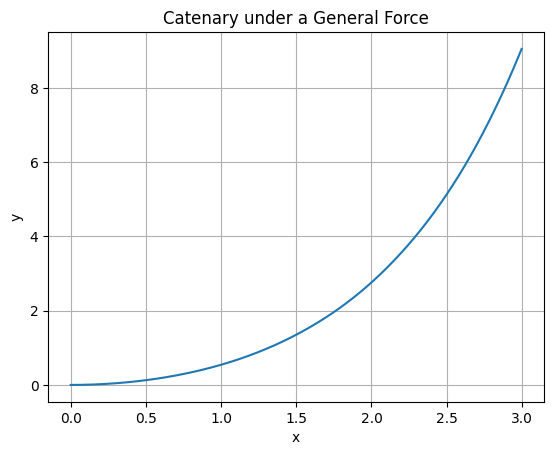

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the general force functions G_x(s) and G_y(s)
def G_x(s, x, y):
    return 0  # example

def G_y(s, x, y):
    return -1  # example representing gravity

# Define the system of ODEs
def ode_system(s, Y):
    x, y, Tx, Ty = Y

    T_mag = np.sqrt(Tx**2 + Ty**2)
    theta = np.arctan2(Ty, Tx)

    dxds = np.cos(theta)
    dyds = np.sin(theta)

    dTxds = G_x(s, x, y)
    dTyds = G_y(s, x, y)
    return [dxds, dyds, dTxds, dTyds]

# Initial conditions
Y0 = [0, 0, 1, 0]  # [x0, y0, Tx0, Ty0]

# Arc length range
s_span = (0, 10)
s_eval = np.linspace(*s_span, 400)

# Solve the ODE system
solution = solve_ivp(ode_system, s_span, Y0, t_eval=s_eval, method='RK45')

# Plotting
plt.plot(solution.y[0], -solution.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Catenary under a General Force')
plt.grid(True)
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1653.43it/s]


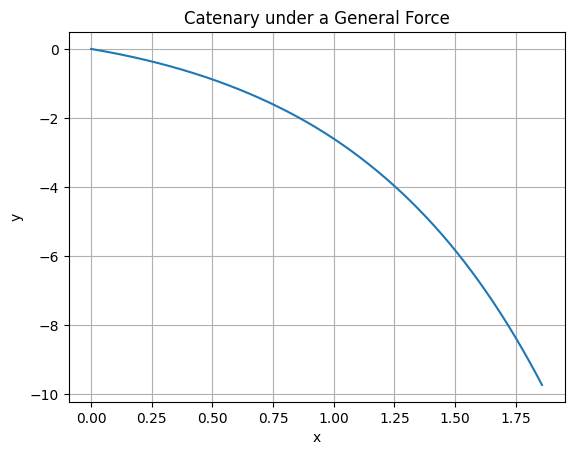

Initial Tension Guess: [0.814164459226131, -0.9734456550205639]


In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the general force functions
def G(s, Y):
    x, y, Tx, Ty = Y
    return [0, -1]  # example representing gravity

# Define the system of ODEs
def ode_system(s, Y):
    x, y, Tx, Ty = Y
    T_mag = np.sqrt(Tx**2 + Ty**2)
    if T_mag == 0:
        return [0, 0, *G(s, Y)]
    return [Tx/T_mag, Ty/T_mag, *G(s, Y)]

# Target end y value
x_end_target = 10
y_end_target = -5
atol = 1e-3

# Initial guess for the tension
T0_guess = [1, 0]

# Integration range
s_span = (0, 10)
s_eval = np.linspace(*s_span, 400)

# Iterate to adjust the initial tension
for iteration in tqdm(range(1000)):
    solution = solve_ivp(ode_system, s_span, [0, 0, *T0_guess], t_eval=s_eval, method='RK45')
    x, y, Tx, Ty = solution.y
    x_end = x[-1]
    y_end = y[-1]
    # Check if the endpoint condition is satisfied
    if abs(x_end - x_end_target) < atol and abs(y_end - y_end_target) < atol:
        print("Reached endpoint condition")
        break
    # Adjust the initial tension guess based on the endpoint error
    T0_guess[0] = -0.1 * (x_end - x_end_target)
    T0_guess[1] = 0.1 * (y_end - y_end_target)

# Plotting
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Catenary under a General Force')
plt.grid(True)
plt.show()

print(f"Initial Tension Guess: {T0_guess}")
